<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/Calculating52wkHighlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
ticker = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv')
#ticker = pd.read_csv('/content/ind_niftyitlist.csv')
#ticker = pd.read_csv('/content/ind_niftybanklist.csv')


In [4]:
#ticker = pd.read_csv('/content/ind_niftyfinancelist.csv')
#ticker2=pd.read_csv('/content/ind_niftybanklist.csv')
#ticker=pd.concat([ticker,ticker2])

In [5]:
ticker=ticker['Symbol'].tolist()
ticker=list(set(ticker))

In [6]:
START = "2013-01-01"  #yyyy-mm-dd
#END = '2019-06-01'

In [7]:
#Download Data From Yahoo Finance
lst=[]
for i in range(len(ticker)):
  dfi = yf.download(str(ticker[i])+'.ns', start=START)

  dfi['result']=dfi['High'].rolling(window=30, min_periods=1).max()
  dfi['result_low']=dfi['Low'].rolling(window=30, min_periods=1).min()
  dfi['high52']=np.where(dfi['High']>=dfi['result'],1,0)
  dfi['low52']=np.where(dfi['Low']<=dfi['result_low'],1,0)
  dfi['below40'] = np.where(((dfi['Close']-dfi['result'])/dfi['Close'])<-0.05,1,0)
  dfi['down40more']= np.where(((dfi['Close']-dfi['result'])/dfi['Close'])<-0.1,1,0)
  dfi = dfi.dropna()

  #df.head(3)
  #print('Done : '+ nifty10[i])
  #print(df.head(2))
  lst.append(dfi)

#df1.head(3)
print('\n All Completed \n')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


 All Completed 



In [8]:
nlst=[]
for i in range(len(ticker)):
  nlst.append(lst[i].high52)
  nlst.append(lst[i].low52)
  nlst.append(lst[i].below40)
  nlst.append(lst[i].down40more)

In [9]:
df = pd.DataFrame(nlst).T
namelist =[]
for i in range(1,len(ticker)+1):
  namelist.append('high_'+str(i))
  namelist.append('low_'+str(i))
  namelist.append('below'+str(i))
  namelist.append('down_'+str(i))
df.columns = namelist

In [10]:
df=df[1:].fillna(0)

In [11]:
features = df.columns.tolist()

In [12]:
feats_set1=[feats for feats in features if feats.startswith('high')]

In [13]:
feats_set2=[feats for feats in features if feats.startswith('low')]

In [14]:
feats_set3=[feats for feats in features if feats.startswith('below')]

In [15]:
feats_set4=[feats for feats in features if feats.startswith('down')]

In [16]:
df_high=df[feats_set1]

In [17]:
df_low=df[feats_set2]

In [18]:
df_below=df[feats_set3]
df_down=df[feats_set4]

In [19]:
df['newhigh']=df_high.sum(axis=1)

In [20]:
df['newlow']=df_low.sum(axis=1)
df['low_40']=df_below.sum(axis=1)
df['down'] = df_down.sum(axis=1)

In [21]:
df_new=df[['newhigh','newlow','low_40','down']]

In [22]:
df_new.tail(2)

,newhigh,newlow,low_40,down
Date,,,,
2024-07-09,12.0,0.0,15.0,3.0
2024-07-10,13.0,0.0,15.0,5.0


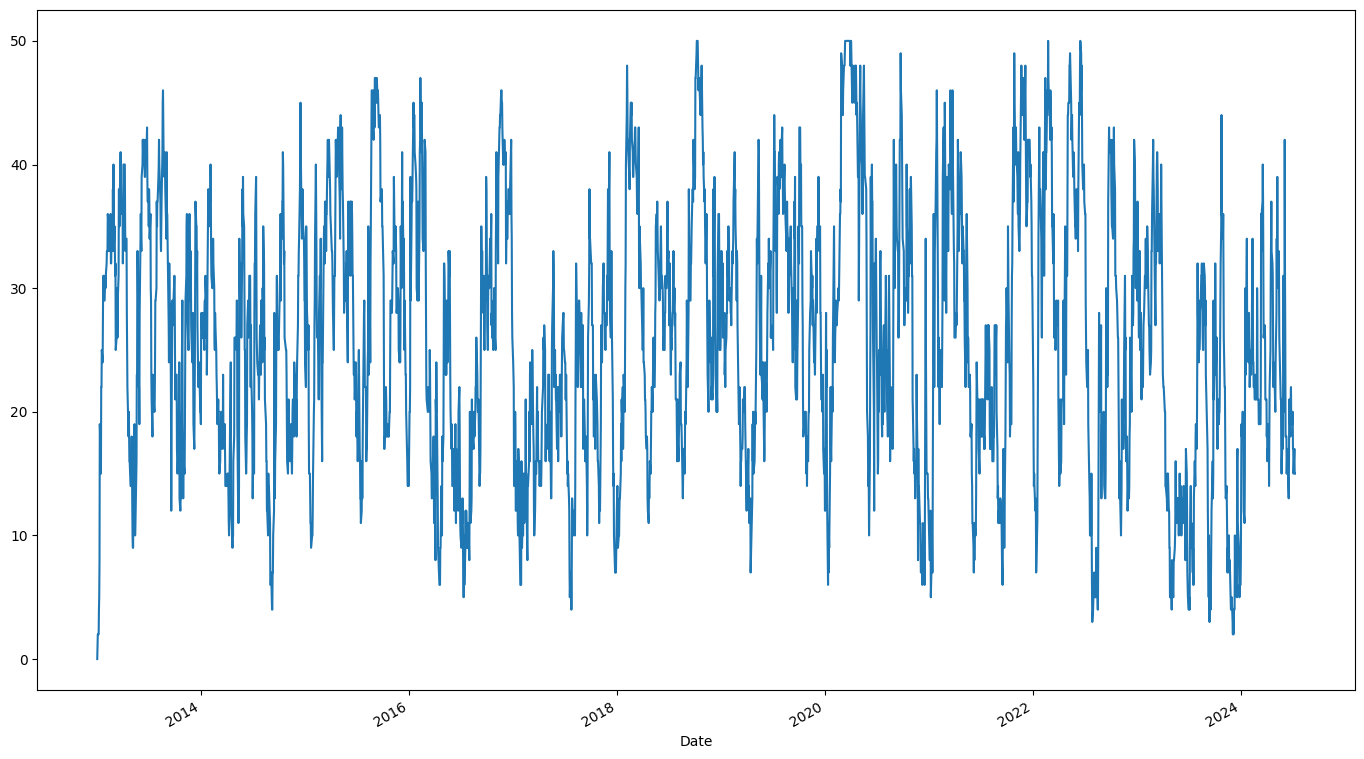

In [23]:
df_new.low_40[:].plot(figsize=(17,10));

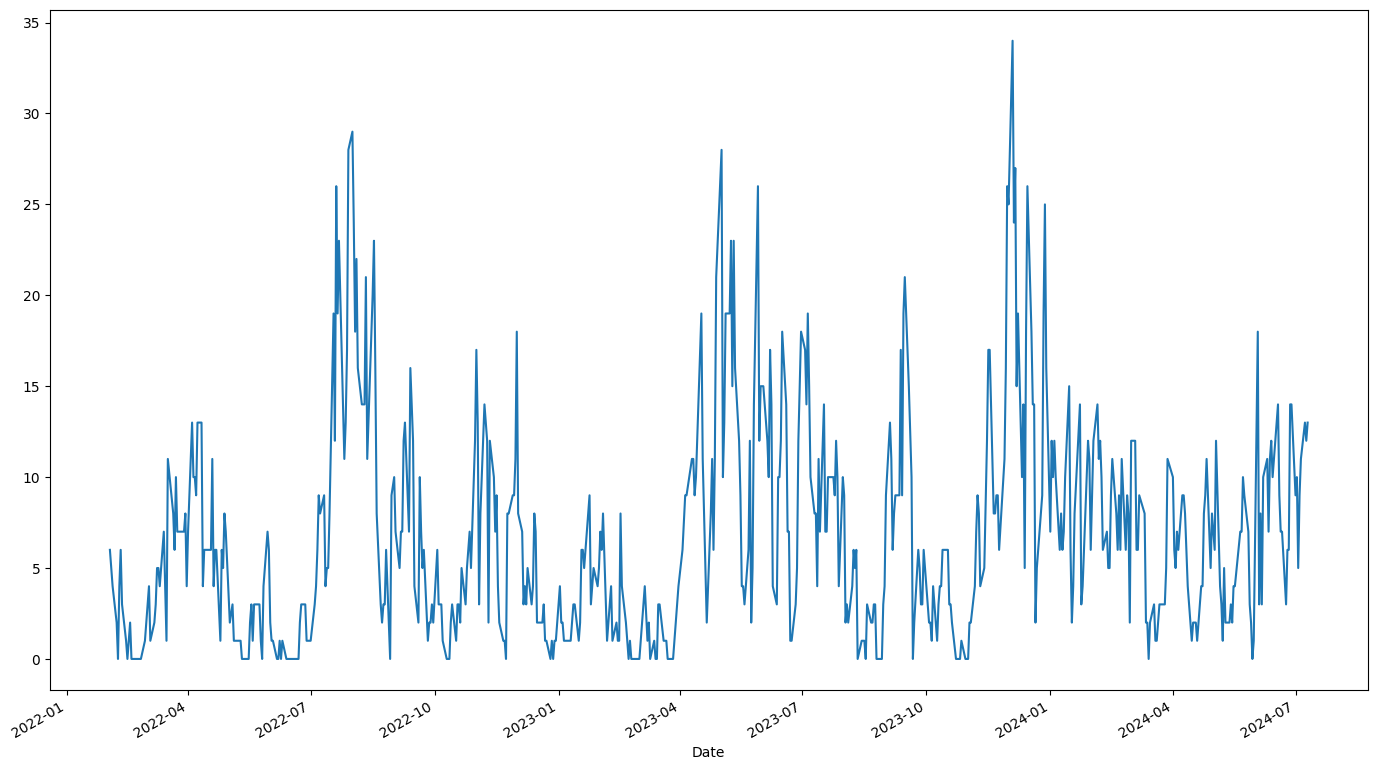

In [24]:
df_new.newhigh[-600:].plot(figsize=(17,10));

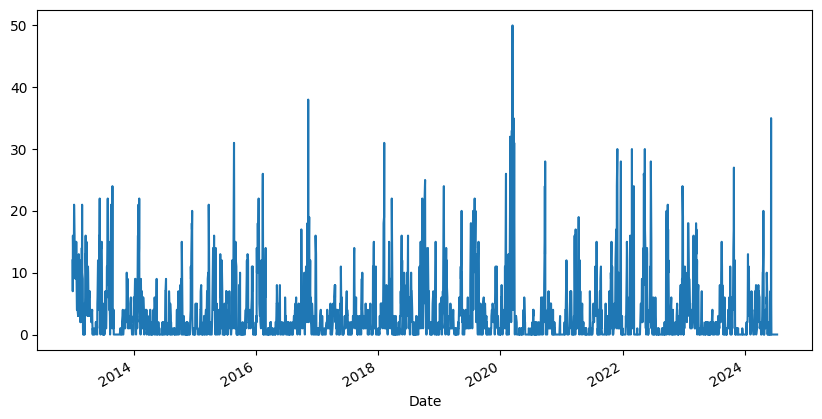

In [25]:
df_new.newlow[:].plot(figsize=(10,5));

In [26]:
data = yf.download('^nsei',start=START)
nifty=data[-600:].copy()

[*********************100%%**********************]  1 of 1 completed


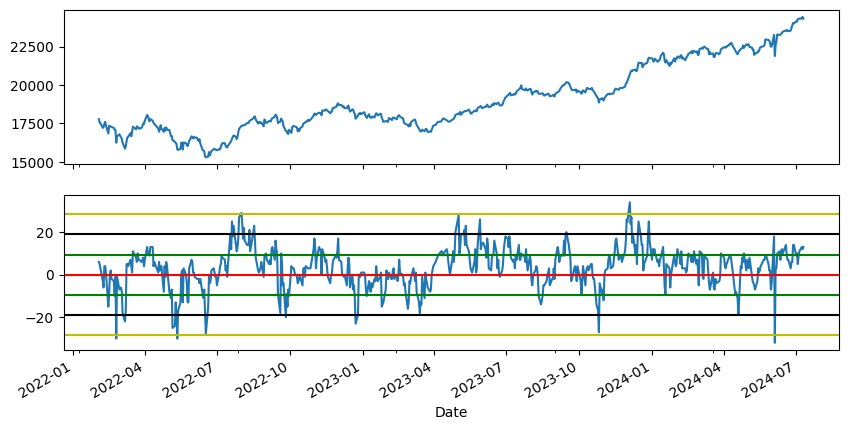

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,10),sharex=True)
ax[0].plot(nifty['Adj Close'])
ax[1]=(df_new.newhigh[-600:]-df_new.newlow[-600:]).plot(figsize=(10,5))
std_dev=(df_new.newhigh[-600:]-df_new.newlow[-600:]).std()
ax[1].axhline(y=0,color='r')
ax[1].axhline(y=0+std_dev,color='g')
ax[1].axhline(y=0+std_dev*2,color='k')
ax[1].axhline(y=0-std_dev,color='g')
ax[1].axhline(y=0-std_dev*2,color='k')
ax[1].axhline(y=0-std_dev*3,color='y')
ax[1].axhline(y=0+std_dev*3,color='y');

In [28]:
nifty=data.copy()

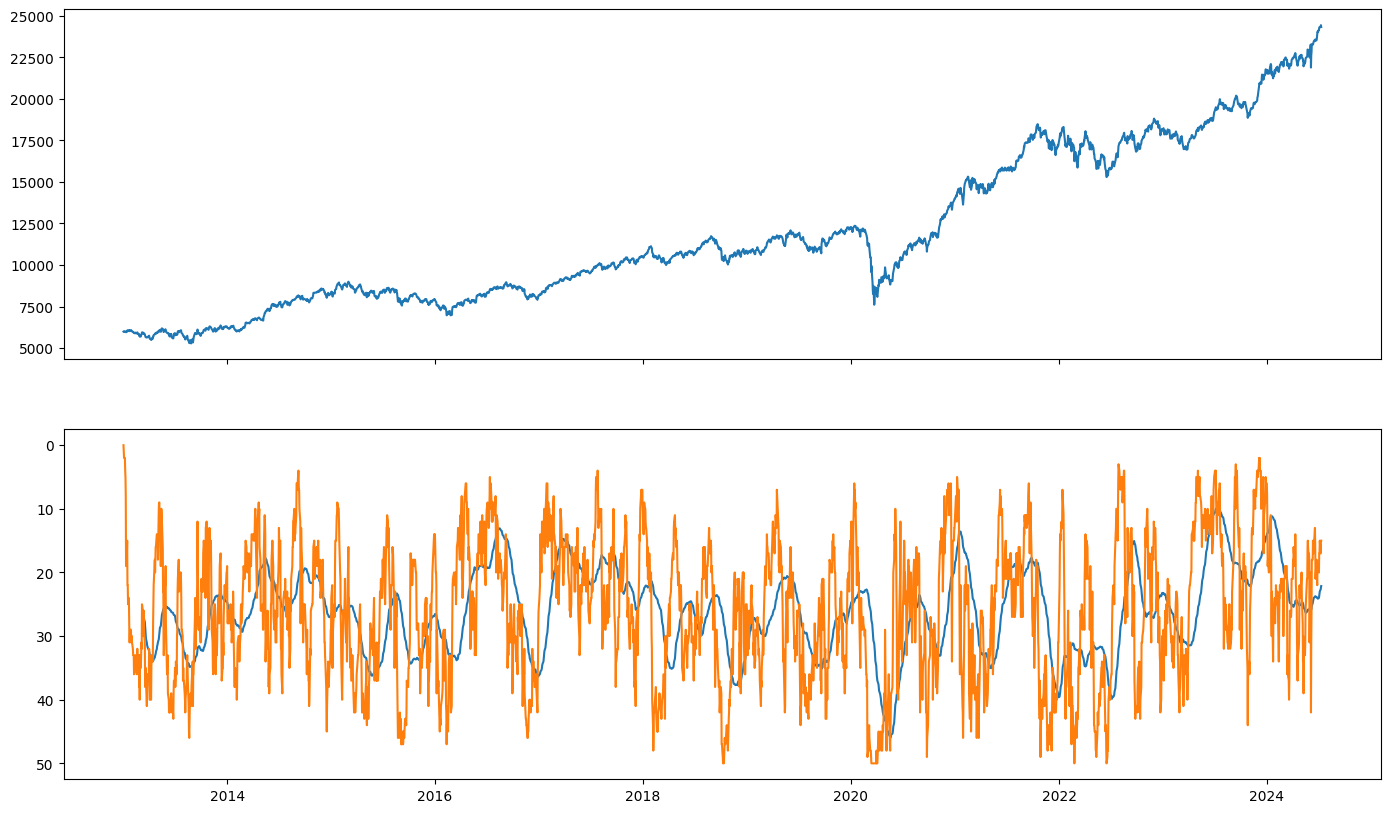

In [29]:
fig, ax = plt.subplots(2,1, figsize=(17,10),sharex=True)
ax[0].plot(nifty['Adj Close'])
ax[1].plot(df_new.low_40.rolling(window=52).mean())
ax[1].plot(df_new.low_40);
plt.gca().invert_yaxis()

In [30]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
fit=sc.fit_transform((df_new.low_40-df_new.low_40.rolling(window=26).mean()).values.reshape(-1,1))

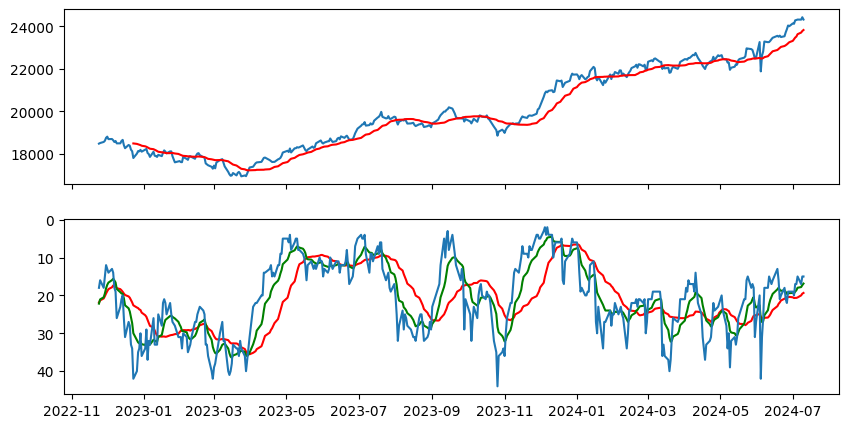

In [31]:
fig, ax = plt.subplots(2,1, figsize=(10,5),sharex=True)
ax[0].plot(nifty['Adj Close'][-400:])
ax[0].plot(nifty['Adj Close'][-400:].rolling(window=22).mean()[-400:],color='r')
ax[1].plot(df_new.low_40.rolling(window=26).mean()[-400:],color='r')
ax[1].plot(df_new.low_40.ewm(span=10).mean()[-400:],color='g')
ax[1].plot(df_new.low_40[-400:]);
plt.gca().invert_yaxis()

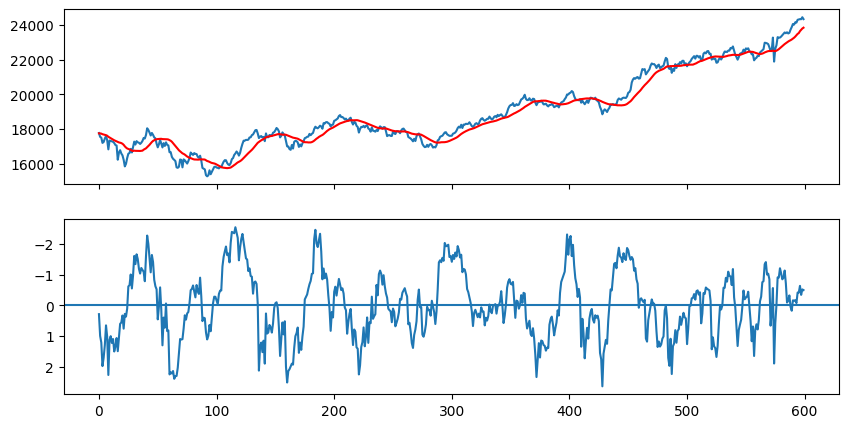

In [32]:
fig, ax = plt.subplots(2,1, figsize=(10,5),sharex=True)
ax[0].plot(nifty['Adj Close'][-600:].values)
ax[0].plot(nifty['Adj Close'].rolling(window=22).mean()[-600:].values,color='r')
ax[1].plot(fit[-600:],lw=1.5)
ax[1].axhline(y=0)
plt.gca().invert_yaxis()
plt.show()

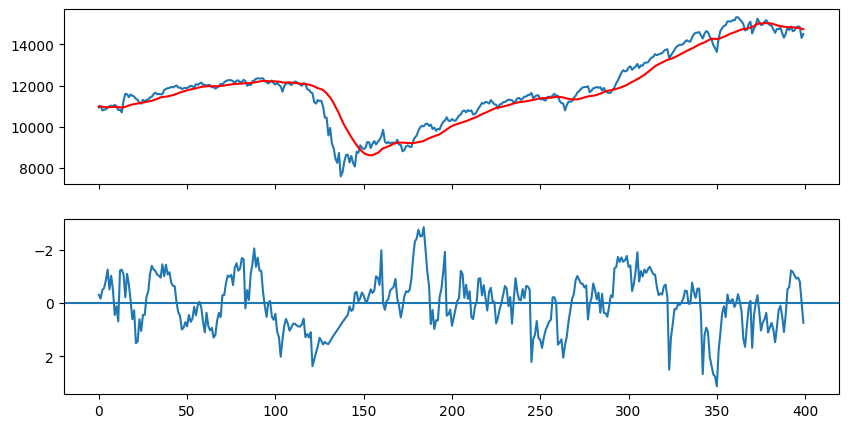

In [33]:
fig, ax = plt.subplots(2,1, figsize=(10,5),sharex=True)
ax[0].plot(nifty['Adj Close'][-1200:-800].values)
ax[0].plot(nifty['Adj Close'].rolling(window=22).mean()[-1200:-800].values,color='r')
ax[1].plot(fit[-1200:-800],lw=1.5)
ax[1].axhline(y=0)
plt.gca().invert_yaxis()
plt.show()

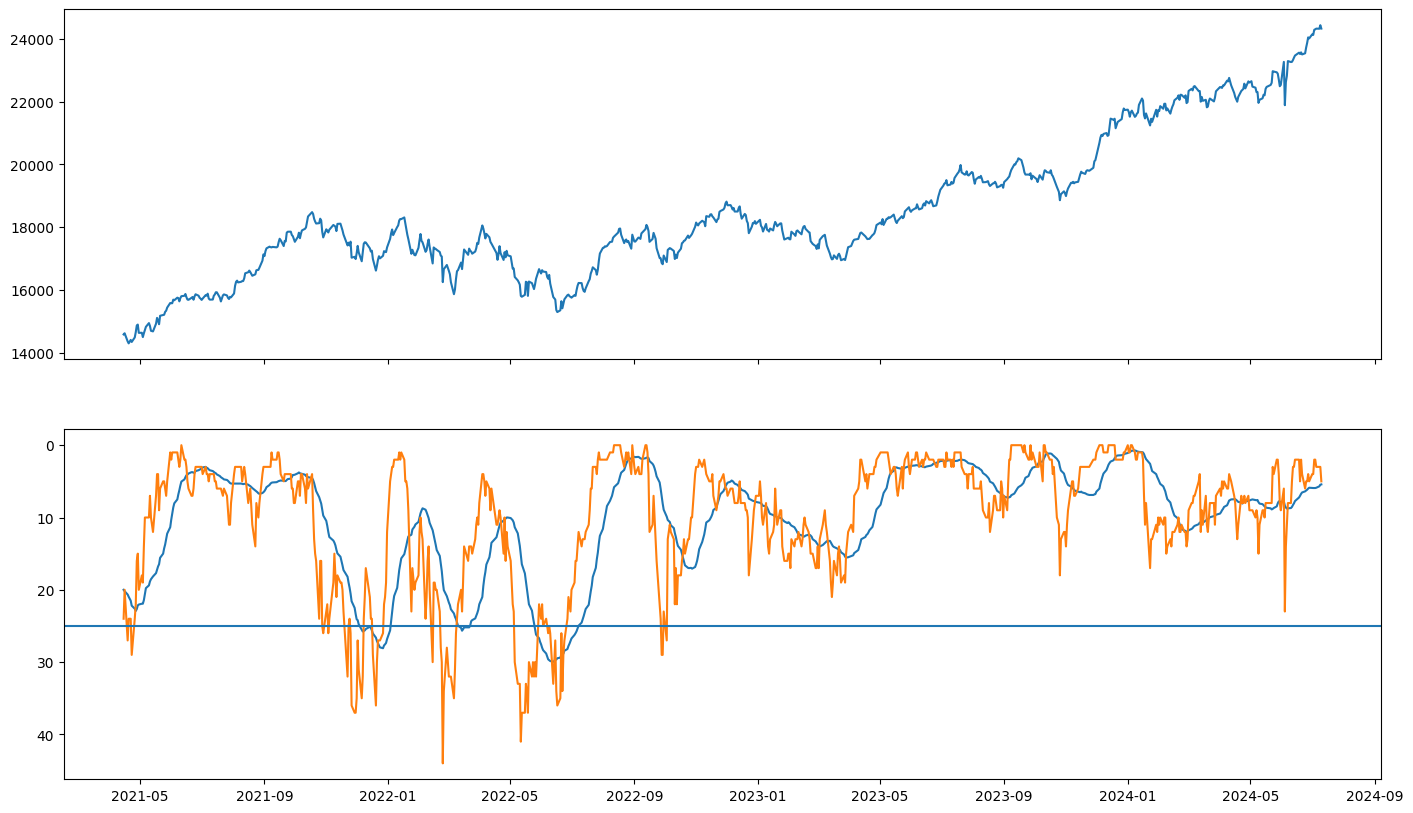

In [34]:
fig, ax = plt.subplots(2,1, figsize=(17,10),sharex=True)
ax[0].plot(nifty['Adj Close'][-800:])
ax[1].plot(df_new.down.rolling(window=26).mean()[-800:])
ax[1].plot(df_new.down[-800:]);
ax[1].axhline(y=25)
plt.gca().invert_yaxis()